# Graph maker

## Context

In this notebook some figures are generated using the matplotlib library.

## Output

- Figure of expected error probability vs number of photons

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import binom
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1 import ImageGrid

In [45]:
# some functions

def Perr_dEspagnat(N):
    # Expected error probability using d'Espagnat's solution for a total number of N photons
    return binom(N,N/2)/2**(N+1)

## Expected error/failure probability vs number of photons for the 2BP

In [46]:
# load data

Perr = []
Pinc = []
Nrange1 = np.arange(2, 14+1, 2)
Nrange2 = np.arange(2, 6+1, 2)

for N in Nrange1:
    Perr += [np.loadtxt("2bp_eigensystem/data/perr_md_2bp_num_N{:d}.txt".format(N))*1]
    
for N in Nrange2:
    Pinc += [np.loadtxt("semidefinite_programs/data/perr_ud_primal2bp_num_N{:d}.txt".format(N))*1]

In [47]:
# fit Helstrom bound

def f(x, a, b, c):
    return a*x**b*np.exp(-c*x)

params, _ = curve_fit(f, Nrange1, Perr, (1,1,1))

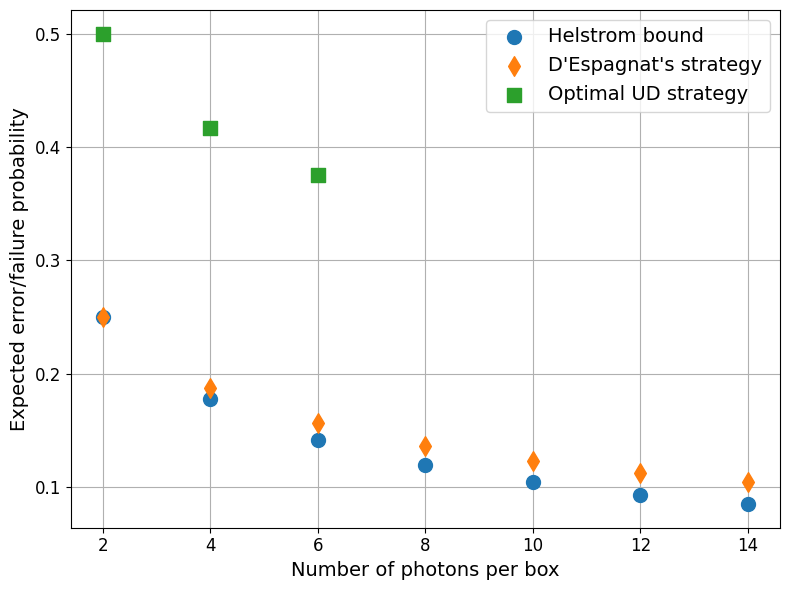

In [48]:
plt.figure(figsize=(8,6))
plt.scatter(Nrange1, Perr, marker='o', s=100, zorder=3, label="Helstrom bound")
plt.scatter(Nrange1, Perr_dEspagnat(Nrange1), marker='d', s=100, zorder=3, label="D'Espagnat's strategy")
plt.scatter(Nrange2, Pinc, marker='s', s=100, zorder=3, label="Optimal UD strategy")
plt.ylabel(r"Expected error/failure probability",fontsize=14)
plt.xlabel("Number of photons per box",fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.tight_layout()
plt.legend(fontsize=14)
plt.savefig('figures/2bp_perr_vs_N.jpg', dpi=300)
plt.show()

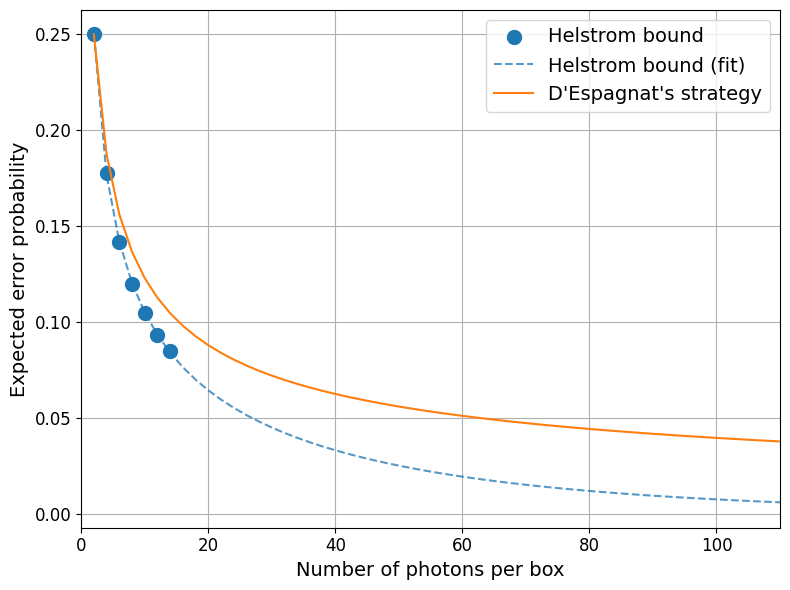

In [49]:
x = np.arange(2,1e2+20,2)
plt.figure(figsize=(8,6))
plt.scatter(Nrange1, Perr, marker='o', s=100, zorder=3, label="Helstrom bound")
plt.plot(x, f(x,*params), ls='--', alpha = 0.75, label="Helstrom bound (fit)")
plt.plot(x, Perr_dEspagnat(x), zorder=3, label="D'Espagnat's strategy")
plt.ylabel(r"Expected error probability",fontsize=14)
plt.xlabel("Number of photons per box",fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.tight_layout()
plt.legend(fontsize=14)
#plt.xscale('log')
#plt.yscale('log')
plt.xlim([0,110])
plt.savefig('figures/2bp_perr_vs_N_fit.jpg', dpi=300)
plt.show()

## Expected error/failure probability vs number of photons for the 3BP

In [50]:
# load data

Perr = []
Pinc = []
Nrange = np.arange(2, 6+1, 2)

for N in Nrange:
    Perr += [np.loadtxt("semidefinite_programs/data/perr_md_primal3bp_num_N{:d}.txt".format(N))*1]
    Pinc += [np.loadtxt("semidefinite_programs/data/unamperr_md_primal3bp_num_N{:d}.txt".format(N))*1]

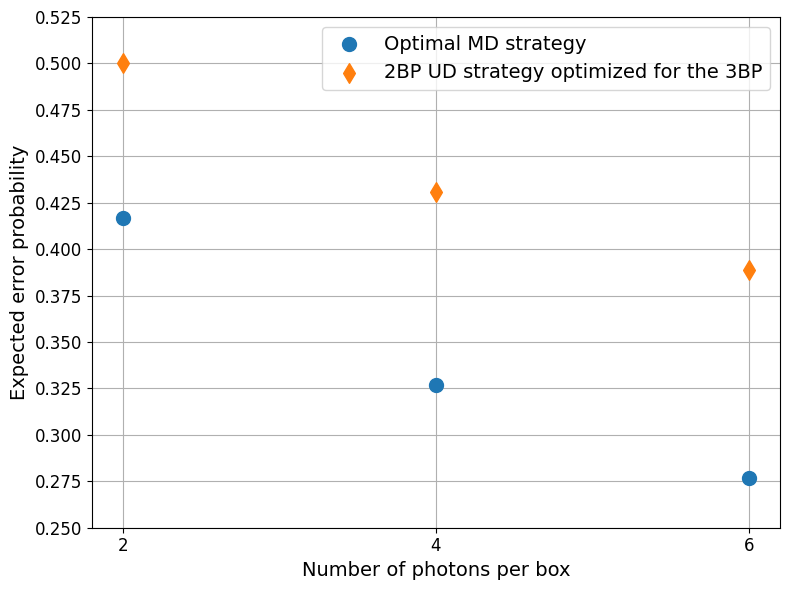

In [51]:
plt.figure(figsize=(8,6))
plt.scatter(Nrange, Perr, marker='o', s=100, zorder=3, label="Optimal MD strategy")
plt.scatter(Nrange, Pinc, marker='d', s=100, zorder=3, label="2BP UD strategy optimized for the 3BP")
plt.ylabel(r"Expected error probability",fontsize=14)
plt.xlabel("Number of photons per box",fontsize=14)
plt.xticks(Nrange,fontsize=12)
plt.yticks(np.arange(0.25,0.53,0.025),fontsize=12)
plt.grid()
plt.tight_layout()
plt.legend(fontsize=14)
plt.savefig('figures/3bp_perr_vs_N.jpg', dpi=300)
plt.show()

## Expected error probability of the classical minimum a posteriori strategies

In [103]:
EEPs = np.load("classical_strats/EEP3BPvsAlpha_N1000.npy", allow_pickle=True)
alpha = np.linspace(-np.pi/8, np.pi/8, 101)

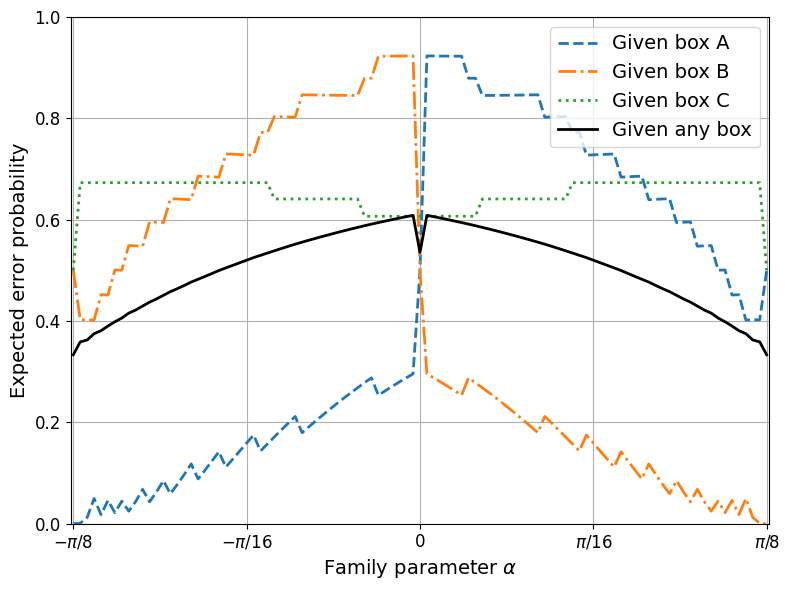

In [104]:
plt.figure(figsize=(8,6))
plt.plot(alpha, EEPs[:,0], lw=2, ls="--", label="Given box A")
plt.plot(alpha, EEPs[:,1], lw=2, ls="-.", label="Given box B")
plt.plot(alpha, EEPs[:,2], lw=2, ls=":", label="Given box C")
plt.plot(alpha, EEPs[:,3], lw=2, color='k', label="Given any box")
plt.xlim([-np.pi/8-3e-3,np.pi/8+3e-3])
plt.xticks([-np.pi/8,-np.pi/16,0,np.pi/16,np.pi/8], [r"$-\pi/8$",r"$-\pi/16$",r"$0$",r"$\pi/16$",r"$\pi/8$"], fontsize=12)
plt.xlabel(r"Family parameter $\alpha$", fontsize=14)
plt.ylabel("Expected error probability", fontsize=14)
plt.yticks(fontsize=12)
plt.ylim([0,1])
plt.grid()
plt.tight_layout()
plt.legend(fontsize=14)
plt.savefig('figures/MAPstrats_EEPvsAlpha_N1000.jpg', dpi=300)
plt.show()

In [105]:
N = list(range(2,11,2)) + list(range(20, 101,10)) + list(range(200,1001,100))

EEPalpha1 = np.zeros_like(N, dtype="float64")
EEPalpha2 = np.zeros_like(N, dtype="float64")
EEPalpha3 = np.zeros_like(N, dtype="float64")

for j in range(len(N)):
    EEPalpha1[j] = np.load("classical_strats/EEP3BPvsAlpha_N{:d}.npy".format(N[j]), allow_pickle=True)[0,3] #alpha 1 is -pi/8
    EEPalpha2[j] = np.load("classical_strats/EEP3BPvsAlpha_N{:d}.npy".format(N[j]), allow_pickle=True)[25,3] #alpha 2 is -pi/16
    EEPalpha3[j] = np.load("classical_strats/EEP3BPvsAlpha_N{:d}.npy".format(N[j]), allow_pickle=True)[50,3] #alpha 3 is 0

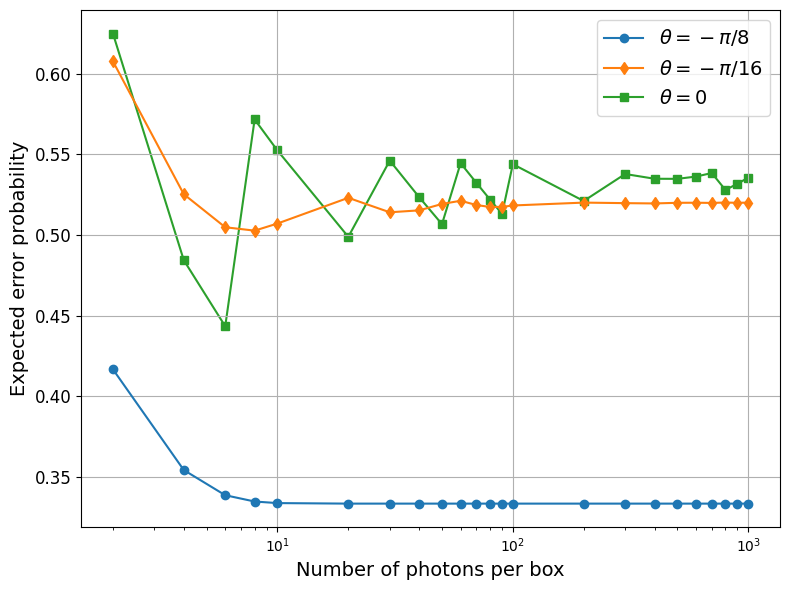

In [106]:
plt.figure(figsize=(8,6))
#plt.scatter(N,EEPalpha1, marker ="o", label=r"$\alpha=-\pi/8$")
plt.plot(N,EEPalpha1, marker ="o", label=r"$\theta=-\pi/8$")
plt.plot(N,EEPalpha2, marker ="d", label=r"$\theta=-\pi/16$")
plt.plot(N,EEPalpha3, marker ="s", label=r"$\theta=0$", zorder=1)
plt.xscale("log")
plt.xlabel("Number of photons per box", fontsize=14)
plt.ylabel("Expected error probability", fontsize=14)
plt.yticks(fontsize=12)
plt.grid()
plt.tight_layout()
plt.legend(fontsize=14)
plt.savefig('figures/MAPstrats_EEPvsN.jpg', dpi=300)
plt.show()

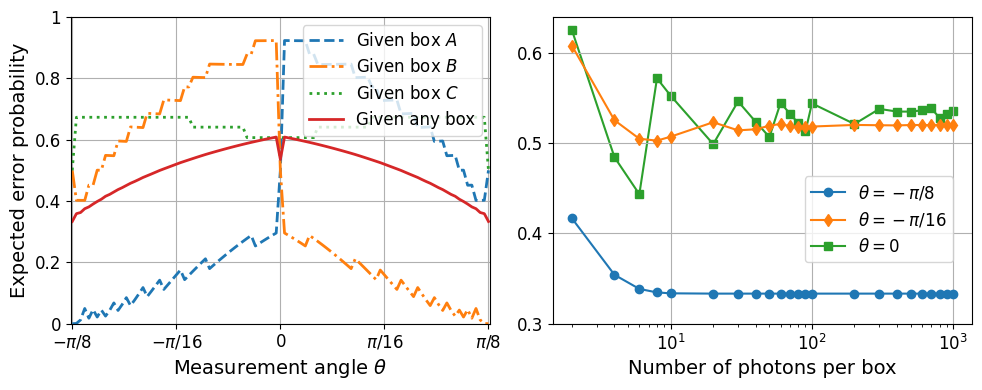

In [117]:
fig, ax = plt.subplots( 1, 2, figsize=(10,4))

ax[0].plot(alpha, EEPs[:,0], lw=2, ls="--", label=r"Given box $A$")
ax[0].plot(alpha, EEPs[:,1], lw=2, ls="-.", label=r"Given box $B$")
ax[0].plot(alpha, EEPs[:,2], lw=2, ls=":", label=r"Given box $C$")
ax[0].plot(alpha, EEPs[:,3], lw=2, label="Given any box")
ax[0].set_xlim([-np.pi/8-3e-3,np.pi/8+3e-3])
ax[0].set_xticks([-np.pi/8,-np.pi/16,0,np.pi/16,np.pi/8], [r"$-\pi/8$",r"$-\pi/16$",r"$0$",r"$\pi/16$",r"$\pi/8$"], fontsize=12)
ax[0].set_xlabel(r"Measurement angle $\theta$", fontsize=14)
ax[0].set_ylabel("Expected error probability", fontsize=14)
ax[0].set_yticks([0,0.2,0.4,0.6,0.8,1],[0,0.2,0.4,0.6,0.8,1], fontsize=12)
ax[0].set_ylim([0,1])
ax[0].grid()
ax[0].legend(fontsize=12, loc="upper right")

ax[1].plot(N,EEPalpha1, marker ="o", label=r"$\theta=-\pi/8$")
ax[1].plot(N,EEPalpha2, marker ="d", label=r"$\theta=-\pi/16$")
ax[1].plot(N,EEPalpha3, marker ="s", label=r"$\theta=0$", zorder=1)
ax[1].set_xticks([10,100,1000],[10,100,1000], fontsize=12)
ax[1].set_xscale("log")
ax[1].set_xlabel("Number of photons per box", fontsize=14)
ax[1].set_yticks([0.3,0.4,0.5,0.6],[0.3,0.4,0.5,0.6], fontsize=12)
ax[1].grid()
ax[1].legend(fontsize=12, loc=(0.6,0.2))

fig.tight_layout()
plt.savefig('figures/MAPstrats_EEPs.jpg', dpi=300)
plt.show()

## Expected error probability of Clarke's experient + maximum a posteriori strategies

In [61]:
EEPs = np.load("clarke_map_strat/3BPClarkeMAPEEP_Nmax200.npy", allow_pickle=True)
N = np.arange(2,200,2)

In [62]:
EEPs[-10:].mean(axis=0)

array([0.4614038604359, 0.4614038604359, 0.8161752059594001,
       0.5796609756104001], dtype=object)

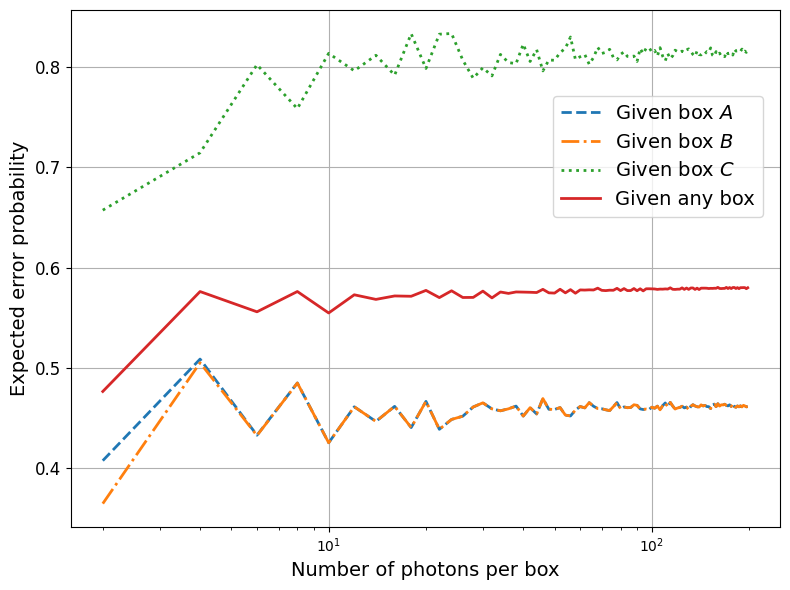

In [63]:
plt.figure(figsize=(8,6))
#plt.scatter(N,EEPalpha1, marker ="o", label=r"$\alpha=-\pi/8$")
plt.plot(N,EEPs[1:,0], ls = "--", lw = 2, label=r"Given box $A$")
plt.plot(N,EEPs[1:,1], ls = "-.", lw = 2, label=r"Given box $B$")
plt.plot(N,EEPs[1:,2], ls = ":", lw = 2, label=r"Given box $C$")
plt.plot(N,EEPs[1:,3], ls = "-", lw = 2, label=r"Given any box")
plt.xscale("log")
plt.xlabel("Number of photons per box", fontsize=14)
plt.ylabel("Expected error probability", fontsize=14)
plt.yticks(fontsize=12)
plt.grid()
plt.tight_layout()
plt.legend(fontsize=14, loc = (0.68,0.6))
plt.savefig('figures/ClarkeMAPstrats_EEPvsN.jpg', dpi=300)
plt.show()

## Likelihoods colormap

In [64]:
LHA = np.load("clarke_map_strat/ClarkeLikelihood_BoxA_N100.npy")
LHB = np.load("clarke_map_strat/ClarkeLikelihood_BoxB_N100.npy")
LHC = np.load("clarke_map_strat/ClarkeLikelihood_BoxC_N100.npy")

N = np.arange(100)
ticks = np.array([20,40,60,80,100])
vmax = np.max(np.maximum(LHA,LHB,LHC))

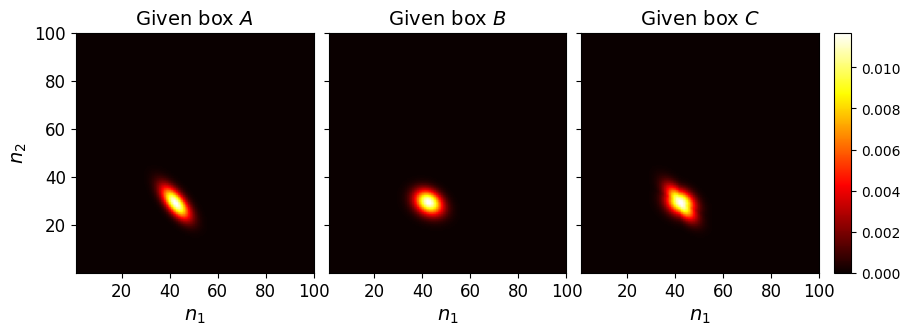

In [65]:
# Set up figure and image grid
fig = plt.figure(figsize=(10, 4))

grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,3),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.15,
                 )

# Add data to image grid
grid[0].set_title(r"Given box $A$",fontsize=14)
grid[1].set_title(r"Given box $B$",fontsize=14)
grid[2].set_title(r"Given box $C$",fontsize=14)
grid[0].imshow(LHA.T, cmap="hot", vmin=0, vmax=vmax)
grid[1].imshow(LHB.T, cmap="hot", vmin=0, vmax=vmax)
im = grid[2].imshow(LHC.T, cmap="hot", vmin=0, vmax=vmax)

# Colorbar
cbar = grid[2].cax.colorbar(im)
grid[2].cax.toggle_label(True)

cbar.ax.tick_params(labelsize=10) 

grid[0].set_ylabel(r"$n_2$", fontsize=14)
for axl in grid:
    axl.set_xlabel(r"$n_1$", fontsize=14)
    axl.set_yticks(ticks,ticks, fontsize=12)
    axl.set_xticks(ticks-1,ticks, fontsize=12)
    #axl.set_adjustable('datalim')
    axl.set_ylim([0,100])
    axl.set_xlim([0,99])

#plt.tight_layout()    # Works, but may still require rect paramater to keep colorbar labels visible
plt.savefig('figures/ClarkeLikelihoods.jpg', dpi=300)
plt.show()

## Expected error probabilities of Clarke's experiment + maximum a posterior for varying theta

In [121]:
theta = np.linspace(0, np.pi, 101)
N = 50

EEPs = np.zeros((len(theta),4), dtype="object")

for j in range(len(theta)):
    
    EEPs[j] = np.load("clarke_map_strat/3BPClarkeMAPEEP_theta{:.3f}_N{:d}.npy".format(theta[j], 2*N))

In [122]:
N_range = np.arange(50+1)

EEPtheta1 = np.zeros_like(N_range, dtype="float64")
EEPtheta2 = np.zeros_like(N_range, dtype="float64")
EEPtheta3 = np.zeros_like(N_range, dtype="float64")

for j in range(len(N_range)):
    EEPtheta1[j] = np.load("clarke_map_strat/3BPClarkeMAPEEP_theta{:.3f}_N{:d}.npy".format(0,2*N_range[j]), allow_pickle=True)[3]
    EEPtheta2[j] = np.load("clarke_map_strat/3BPClarkeMAPEEP_theta{:.3f}_N{:d}.npy".format(np.pi/4,2*N_range[j]), allow_pickle=True)[3]
    EEPtheta3[j] = np.load("clarke_map_strat/3BPClarkeMAPEEP_N{:d}.npy".format(2*N_range[j]), allow_pickle=True)[3]

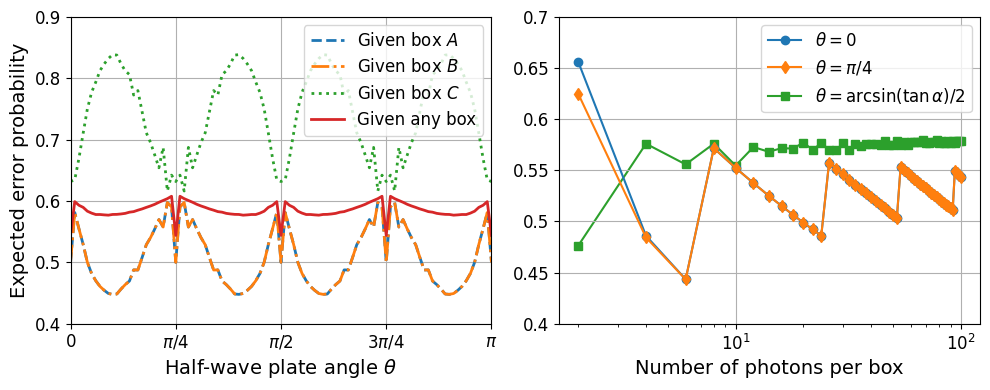

In [127]:
fig, ax = plt.subplots( 1, 2, figsize=(10,4))

ax[0].plot(theta, EEPs[:,0], lw=2, ls="--", label=r"Given box $A$")
ax[0].plot(theta, EEPs[:,1], lw=2, ls="-.", label=r"Given box $B$")
ax[0].plot(theta, EEPs[:,2], lw=2, ls=":", label=r"Given box $C$")
ax[0].plot(theta, EEPs[:,3], lw=2, label="Given any box")
ax[0].set_xlim([0,np.pi])
ax[0].set_xticks([0,np.pi/4,np.pi/2,3*np.pi/4,np.pi], [r"$0$",r"$\pi/4$",r"$\pi/2$",r"$3\pi/4$",r"$\pi$"], fontsize=12)
ax[0].set_xlabel(r"Half-wave plate angle $\theta$", fontsize=14)
ax[0].set_ylabel("Expected error probability", fontsize=14)
ax[0].set_yticks([0.4,0.5,0.6,0.7,0.8,0.9],[0.4,0.5,0.6,0.7,0.8,0.9], fontsize=12)
ax[0].set_ylim([0.4,0.9])
ax[0].grid()
ax[0].legend(fontsize=12, loc="upper right")

ax[1].plot(2*N_range[1:],EEPtheta1[1:], marker ="o", label=r"$\theta=0$")
ax[1].plot(2*N_range[1:],EEPtheta2[1:], marker ="d", label=r"$\theta=\pi/4$")
ax[1].plot(2*N_range[1:],EEPtheta3[1:], marker ="s", label=r"$\theta=\arcsin(\tan\alpha)/2$", zorder=1)
ax[1].set_xlabel("Number of photons per box", fontsize=14)
ax[1].set_xticks([10,100],[10,100], fontsize=12)
ax[1].set_xscale("log")
ax[1].set_ylim([0.4,0.7])
ax[1].set_yticks([0.4,0.45,0.5,0.55,0.6,0.65,0.7],[0.4,0.45,0.5,0.55,0.6,0.65,0.7], fontsize=12)
ax[1].grid()
ax[1].legend(fontsize=12, loc="upper right")

fig.tight_layout()
plt.savefig('figures/ClarkeMAPstrats_EEPs.jpg', dpi=300)
plt.show()